In [ ]:
# Kianna's Code

In [3]:
# Borrowed from Jose
import numpy as np
import pandas as pd
import scipy as sp
import pylab as pl
import scipy.cluster.hierarchy as hier
import scipy.spatial.distance as dist
import matplotlib as plt
%matplotlib inline

In [4]:
# Borrowed from Jose
gene = pd.read_excel('gene_expression_table4.xlsx')
#print(gene)
#datamatrix=[]
del gene['Unnamed: 9'] # deleted column without any content
#append each column except the first column which is the gene ID
just_expression=gene.iloc[0:373,3:14]
print(just_expression)
just_expression.as_matrix  # transformed dataframe with expression values to array
just_expression.shape
dist_matrix= dist.pdist(just_expression)
dist_square_matrix = dist.squareform(dist_matrix)
#print(dist_square_matrix)

          5       2       6        4        3       1     1.1     5.1     3.1  \
0    3373.5  3757.8  3380.3   4560.2   4682.9  4182.9  5050.6  5820.5  4527.5   
1    1383.0  1501.8  1599.8   1433.7   1359.0  1565.5  1264.8  1285.5  1228.7   
2     864.7  1184.6  1465.4   1387.8   1414.6  1589.6  1847.7  2322.5  2966.6   
3     721.8   940.9   907.6    975.7    865.1   803.3  1417.6   995.4  1650.5   
4     419.0   389.1   390.7    356.1    452.8   400.2   866.8   580.3   637.7   
5     575.4   439.0   496.2    549.3    667.7   588.9   741.2   661.5   821.5   
6      85.9   191.7   113.9     67.4     71.8    89.9   219.8   256.2   267.4   
7     959.6  1083.6  1162.8   1130.0   1088.6  1326.4  1484.5  1677.5  1838.5   
8    1273.6  1216.4  1254.3   1150.1   1242.5  1153.8  1424.4  1736.1  1548.4   
9    4634.5  3749.6  4443.9   3844.0   4063.3  3896.4  3717.0  3725.6  3466.5   
10    327.7   385.4   477.3    259.9    485.8   315.3   608.6   788.1   692.1   
11   4159.3  4099.5  3874.2 

In [ ]:
 # gene

In [ ]:
# Structure of this lasso found on :
# https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/

# Notes on thie lasso function

#    α = 0: Same coefficients as simple linear regression
#    α = ∞: All coefficients zero
#    0 < α < ∞: coefficients between 0 and that of simple linear regression

#    Goal: 10 coefficients that are not 0

from sklearn.linear_model import Lasso
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

In [ ]:
#Initialize predictors to all 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(gene, just_expression, alpha_lasso[i], models_to_plot)

In [7]:
# Jose's
#print(just_expression)
BRCA1_plus= just_expression.iloc[:,0:6]
#print(BRCA1_plus.T)
BRCA1_minus= just_expression.iloc[:,7:12]
#print(BRCA1_minus.T)

BRCA1_plus_means=np.mean(BRCA1_plus.T)
#print(BRCA1_plus_means.shape)
BRCA1_minus_means=np.mean(BRCA1_minus.T)
#print(BRCA1_minus_means.shape)

concatenated_means= np.c_[BRCA1_plus_means,BRCA1_minus_means]
#print(concatenated_means)

expression_change_abs= np.abs(np.diff(concatenated_means))
#print(expression_change_abs.shape)

expression_change_raw= np.diff(concatenated_means)
#print(expression_change_raw)

concatenated_means=np.append(expression_change_abs,expression_change_raw,1) # appended raw and abs value of means
#print(r)

In [8]:
# Jose's
labels=gene.iloc[0:373,0:3] # isolated gene names and functions
#print(labels.shape)
names=['mean','raw mean']
mean_pandas2= pd.DataFrame(concatenated_means,columns=names) # transformed concatenated means to dataframe
print(mean_pandas2.shape)

mean_append= np.append(labels,mean_pandas2,1) # appended gene labels to concatenated means

names2= ['gene name', 'symbol','function','abs value mean difference','raw mean difference']
labels_and_means =pd.DataFrame(mean_append,columns=names2)

sorted_means=labels_and_means.sort(['abs value mean difference'],ascending=False)
print(sorted_means)

(373, 2)
    gene name     symbol                 function abs value mean difference  \
33     J00105        B2M                      MHC                   5113.19   
89     U78525     EIF3S9              translation                   4419.59   
193    U71088     MAP2K5      signal transduction                   3964.28   
42     M19311      CALM1               cell cycle                    3690.3   
153    M97796       ID2             transcription                   3498.07   
63     M20471       CLTA                structure                   3286.91   
302    U53347     SLC1A5                transport                   3277.22   
318    M34338        SRM                 synthase                   2935.18   
138    D49824  HLAB-null                 receptor                   2921.48   
242    Y12711        PBP                 receptor                   2904.28   
104    M88279      FKBP4      signal transduction                    2659.8   
312    X04654     SNRP70           RNA proc

C:\Users\kiahales\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [78]:
#from pandas import *
#idx = Int64Index([np.arange(373)])9
#index_sorted_means = DataFrame(index = np.arange(sorted_means.size), data =(sorted_means))
#index_sorted_means
#sorted_means
names_labels=['labels']
index_sorted_means = pd.DataFrame(np.arange(373),columns=names_labels)
#print(index_sorted_means)

data_names= ['labels','gene name', 'symbol','function','abs value mean difference','raw mean difference']
a = np.append(index_sorted_means, sorted_means,1)
my_labels= pd.DataFrame(a, columns=data_names)
my_labels2= my_labels[my_labels.function !='unknown']
my_labels2


,labels,gene name,symbol,function,abs value mean difference,raw mean difference
0,0,J00105,B2M,MHC,5113.19,5113.19
1,1,U78525,EIF3S9,translation,4419.59,-4419.59
2,2,U71088,MAP2K5,signal transduction,3964.28,-3964.28
3,3,M19311,CALM1,cell cycle,3690.3,3690.3
4,4,M97796,ID2,transcription,3498.07,3498.07
5,5,M20471,CLTA,structure,3286.91,-3286.91
6,6,U53347,SLC1A5,transport,3277.22,-3277.22
7,7,M34338,SRM,synthase,2935.18,-2935.18
8,8,D49824,HLAB-null,receptor,2921.48,2921.48
9,9,Y12711,PBP,receptor,2904.28,2904.28


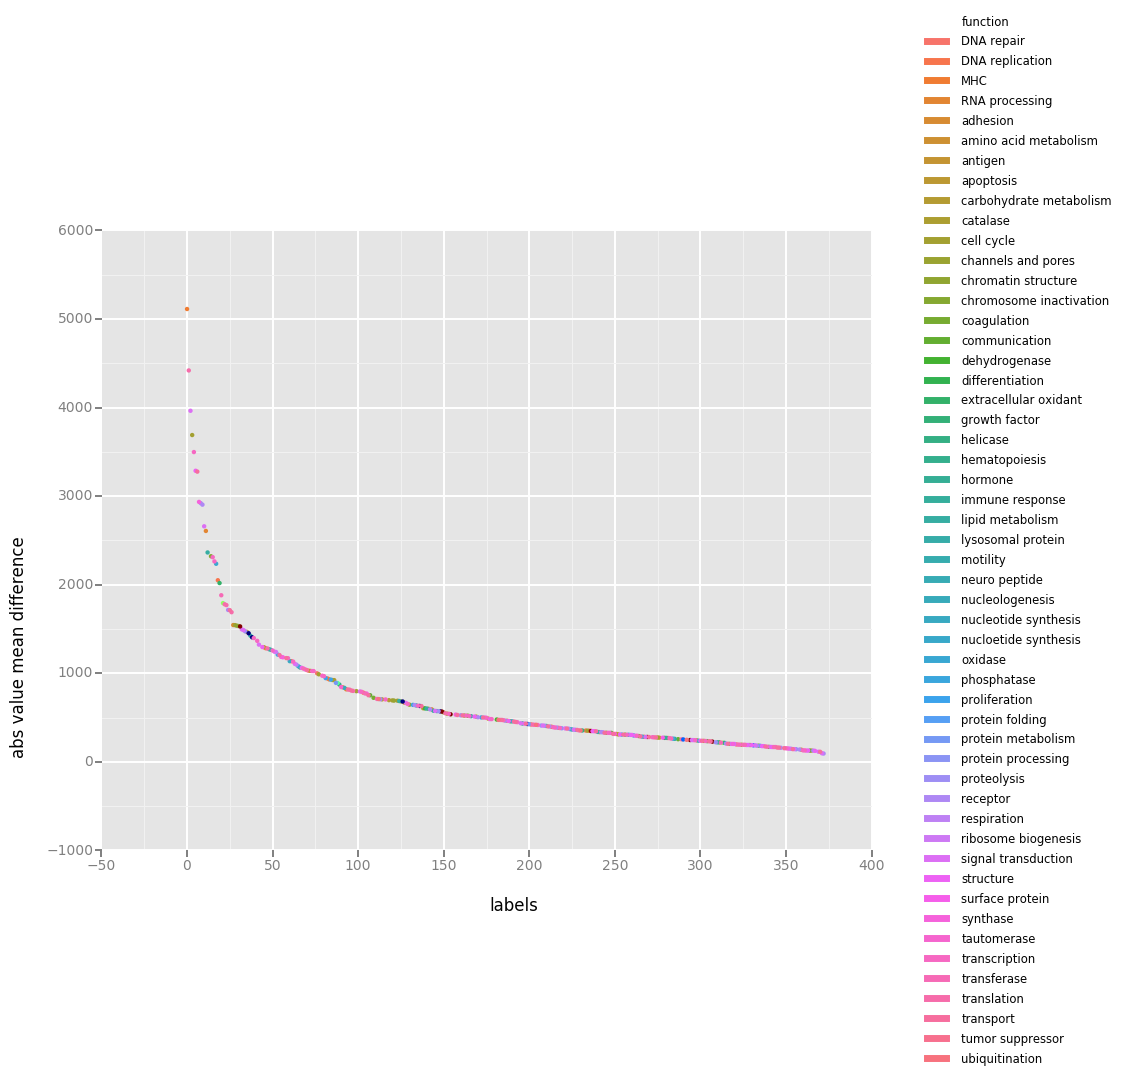

<ggplot: (155077713349)>

In [79]:
from ggplot import *
ggplot(my_labels2, aes(x = 'labels', y = 'abs value mean difference', color = 'function')) + \
    geom_point(size = 10)

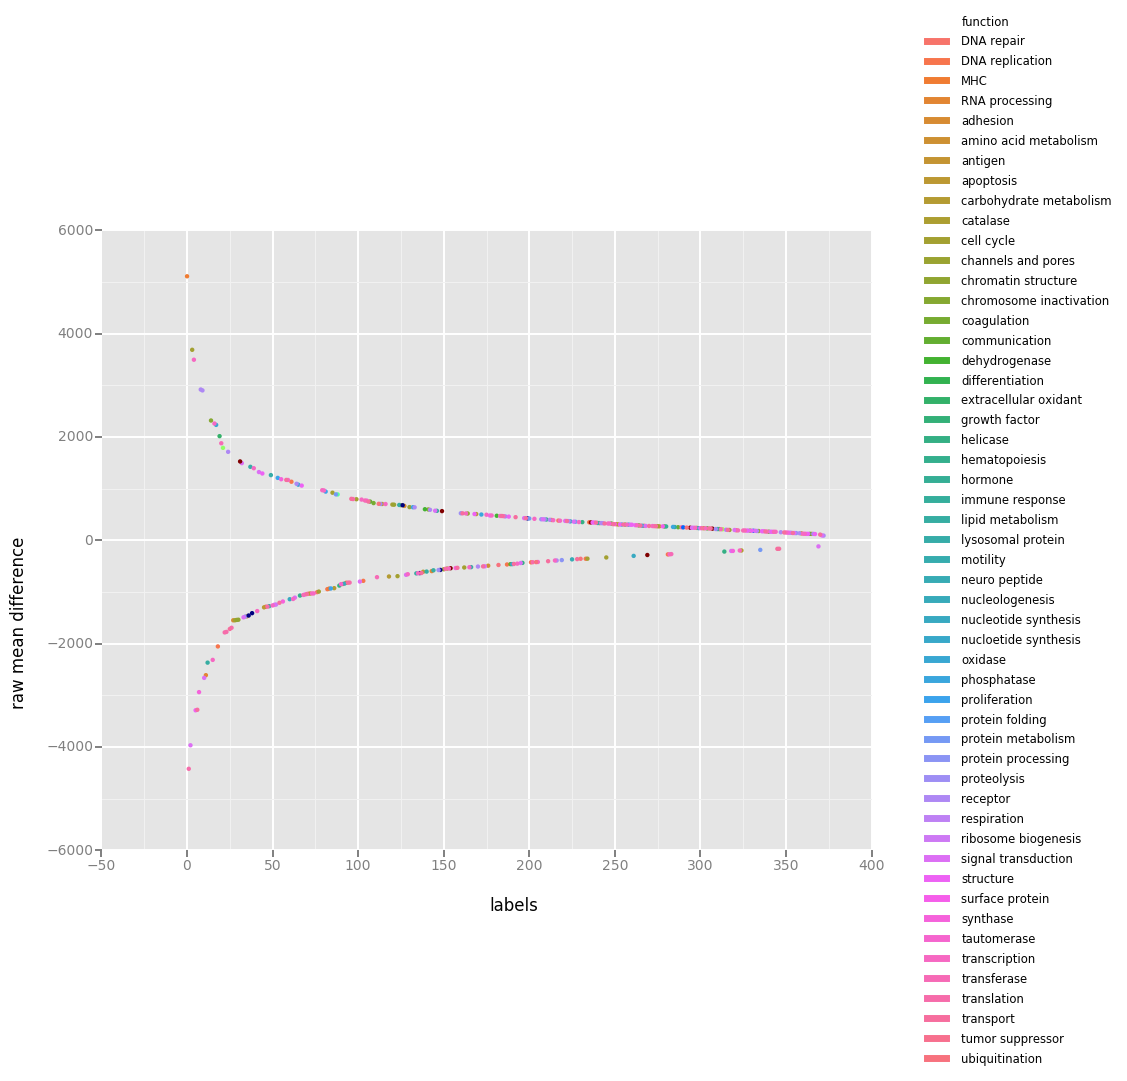

<ggplot: (155077719949)>

In [80]:
from ggplot import *
ggplot(my_labels2, aes(x = 'labels', y = 'raw mean difference', color = 'function')) + \
    geom_point(size = 10)